In [1]:
import matplotlib.pyplot as plt
import numpy as np
import signac

In [2]:
project = signac.get_project("../")

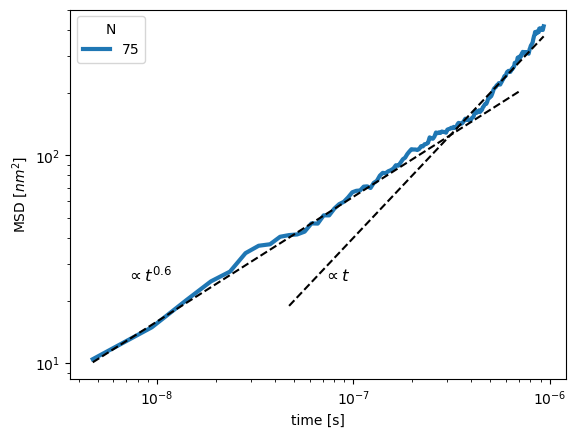

In [10]:
for length, jobs in project.find_jobs({"doc.sampled": True}).groupby("doc.lengths"):
    for job in jobs:
        time = np.load(job.fn("msd_time.npy"))
        msd_nm = np.load(job.fn("msd_data_real_nm_squared.npy"))
        plt.plot(time[1:], msd_nm[1:], linewidth=3, label=length)
    plt.plot(
        time[1:150],
        time[1:150]**(0.6) * 10e5,
        color="black",
        linestyle="--"
    )
    plt.plot(
        time[10:],
        time[10:] * 4e8,
        color="black",
        linestyle="--"
    )
    plt.text(0.7e-8, 25, "$\propto t^{0.6}$",fontsize=12, color="black")
    plt.text(0.7e-7, 25, "$\propto t$",fontsize=12, color="black")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("time [s]")
plt.ylabel("MSD [$nm^2]$")
plt.legend(title="N")

In [7]:
time.shape

(199,)